# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [388]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

print("Loading data......")
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'
signname_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signname_file) as f:
    f.readline() #skip header
    signnames = [row[1] for row in csv.reader(f)]
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("Loading data is complted. ")
print("Shape of image : ",X_train[0].shape)
print("Labels {}".format(len(y_train)))
print("Labels {}".format(y_train[1200]))
print("No of classes : ",signnames)

Loading data......
Loading data is complted. 
Shape of image :  (32, 32, 3)
Labels 34799
Labels 36
No of classes :  ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Ke

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [389]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# n_classes = len(signnames)
n_classes = np.unique(y_train).size;


print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  210.,  210.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of

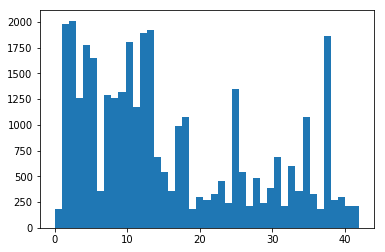

In [390]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.hist(y_train, bins=n_classes)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [391]:
import cv2
#  Normalize the data
def normalize(image_data):
    return image_data.astype(np.float32)/128. -1.
# Convert Image to grayscale
def rgb2gray(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image
    
# Itrate over image set to convert grayscale
def preprocess(data):
    gray_images=[]
    for image in data:
        gray = rgb2gray(image)
        gray_images.append(gray)
    print('grayscale convertion completed..')
    return np.array(gray_images)
        


In [392]:
from numpy import newaxis

print('Preprocessing training data...')

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize(X_train) 

print('Finished preprocessing X_train training data.')
# Check shape after preprocess imgae
print('Shape of image after preprocess = {}'.format(X_train[0].shape))


Preprocessing training data...
grayscale convertion completed..
Finished preprocessing X_train training data.
Shape of image after preprocess = (32, 32, 1)


In [393]:
# preprocess test data
print('Test data preprocess started...')
X_test = preprocess(X_test)
X_test = X_test[...,newaxis]
# Normalize the test data
X_test = normalize(X_test)
print('Test data preprocess completed')

print('Shape of test data image after preprocess {}'.format(X_test[0].shape))
print('All data preprocessing complete.')


Test data preprocess started...
grayscale convertion completed..
Test data preprocess completed
Shape of test data image after preprocess (32, 32, 1)
All data preprocessing complete.


In [394]:
# generate addtional data
from scipy import ndimage
import random

pics_in_class = np.bincount(y_train)
print('pics_in_class  : ',pics_in_class)

pics_mean = int(np.mean(pics_in_class))
print('pics_mean : ',pics_mean)

min_desired = int(pics_mean)
print('min_desired : ',min_desired)

print('generating new data...')

# Angles used to rotate image
angles = [10,-10,15,-15,20,-20]

# itrate through each class
for i in range(len(pics_in_class)):
    if pics_in_class[i] < min_desired:
        # count how many more pics required
        delta = min_desired - pics_in_class[i]
        picture = np.where(y_train==i)
        more_X = []
        more_y = []
       #  make no of additional pics to reach mean
        for num in range(delta):
            #rotate the image and add to more_X and class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            #Appned the pictures generated back to each class to original data
            more_y.append(i)
        
        X_train = np.append(X_train,np.array(more_X),axis=0)
        y_train = np.append(y_train, np.array(more_y),axis=0)
# Addtional data genrated
print('Additional data generated..')


        
        

    
        



pics_in_class  :  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
pics_mean :  809
min_desired :  809
generating new data...
Additional data generated..


The updated number of training examples = 46714


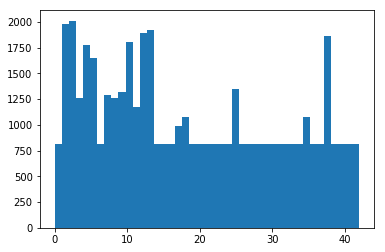

In [395]:
plt.hist(y_train, bins = n_classes)

updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)





In [396]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

print("Number of training examples = {}" .format(n_train))
print("Number of valid examples = {}" .format(n_validation))
print("Number of testing examples = {}" .format(n_test))


Dataset successfully split for training and validation.
Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630


### Model Architecture

In [397]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten



def LeNet(x, KEEP_PROB):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Input = 32x32x1. Output = 28x28x6.
    # Convolutional. 
    conv1_w = tf.Variable(tf.truncated_normal((5, 5, 1, 6), mu, sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, [1, 1, 1, 1], 'VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
       
    # Layer 2: Input = 14x14x6. Output = 10x10x16.
    # Convolutional. 
    conv2_w = tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool1, conv2_w, [1, 1, 1, 1], 'VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
      
    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)   
    
    # Layer 3: Input = 400. Output = 120.
    # Fully Connected. 
    full1_w = tf.Variable(tf.truncated_normal((400, 120), mu, sigma))
    full1_b = tf.Variable(tf.zeros(120))
    full1 = tf.matmul(flat, full1_w) + full1_b
    # Activation.
    full1 = tf.nn.relu(full1) 
    # Dropout
    full1 = tf.nn.dropout(full1, KEEP_PROB)
    
    # Layer 4: Input = 120. Output = 84.
    # Fully Connected. 
    full2_w = tf.Variable(tf.truncated_normal((120, 84), mu, sigma))
    full2_b = tf.Variable(tf.zeros(84))
    full2 = tf.matmul(full1, full2_w) + full2_b
    # Activation.
    full2 = tf.nn.relu(full2)
    # Dropout
    full2 = tf.nn.dropout(full2, KEEP_PROB)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    full3_w = tf.Variable(tf.truncated_normal((84, 43), mu, sigma))
    full3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(full2, full3_w) + full3_b
    
    return logits





### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [398]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Placeholder
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder_with_default(1.0, shape=())

# Hyperparameters
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128

# Train method
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)


# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

    
# Train the Model

train_losses = []
valid_losses = []
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        print("EPOCH {} :".format(i+1), end=' ')
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            train_loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            train_losses.append(train_loss)
        validation_accuracy, valid_loss = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        valid_losses.append(valid_loss)
                
    saver.save(sess, './lenet.ckpt')
    print("Model saved")
            



Training...
EPOCH 1 : Validation Accuracy = 0.727
EPOCH 2 : Validation Accuracy = 0.854
EPOCH 3 : Validation Accuracy = 0.907
EPOCH 4 : Validation Accuracy = 0.929
EPOCH 5 : Validation Accuracy = 0.941
EPOCH 6 : Validation Accuracy = 0.958
EPOCH 7 : Validation Accuracy = 0.963
EPOCH 8 : Validation Accuracy = 0.969
EPOCH 9 : Validation Accuracy = 0.975
EPOCH 10 : Validation Accuracy = 0.975
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [399]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess,'./lenet.ckpt')
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {}".format(test_accuracy))

Train Accuracy = (0.9830883402311974, 0.06435158)
Valid Accuracy = (0.974529109589041, 0.031474072)
Test Accuracy = (0.915360253544337, 0.42860284)


### Predict the Sign Type for Each Image

Image 0 = stop.png
Shape::: (32, 32, 3)
Image 1 = yield.jpg
Shape::: (32, 32, 3)
Image 2 = bumpy.jpg
Shape::: (32, 32, 3)
Image 3 = slippery.png
Shape::: (32, 32, 3)
Image 4 = speed-limit.png
Shape::: (32, 32, 3)
Image 5 = round.jpg
Shape::: (32, 32, 3)


/Users/bajrangchapola/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


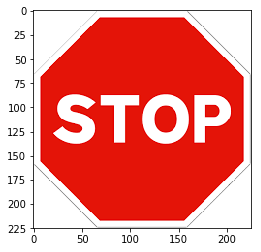

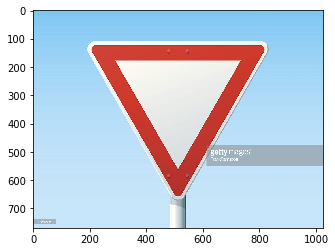

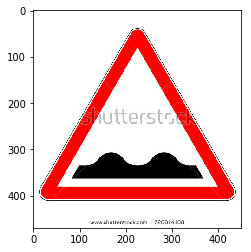

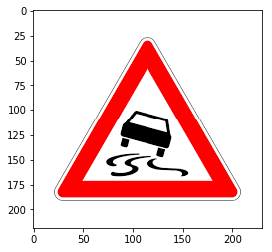

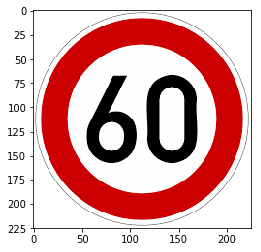

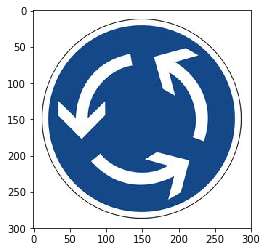

In [400]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import scipy.misc as scms

n_images = 6
X_test_traffic_sign = np.zeros((n_images,32,32,3),dtype=np.float32)

dir = 'test-traffic-sign/'
names = ['stop.png',\
         'yield.jpg',\
         'bumpy.jpg',\
         'slippery.png',\
         'speed-limit.png',\
         'round.jpg',\
         ]

Y_test_traffic_sign = np.array([14,13,22,23,5,40])

for name,i in zip(names,range(0,n_images)):
    image = mpimg.imread(dir+name)
    print("Image {} = {}".format(i,name))
    plt.figure()
    plt.imshow(image)
    # Resize to 32x32 and store in the array of test data
    resized_image = scms.imresize(image,(32,32,3))
    X_test_traffic_sign[i] = resized_image
    print('Shape::: {}'.format(resized_image.shape))

### Analyze Performance

In [401]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

X_test_traffic_sign = normalize(X_test_traffic_sign)
X_test_traffic_sign = pre_process_image(X_test_traffic_sign)
print('Shape after pre process : {}'.format(X_test_traffic_sign[0].shape))

prediction = tf.argmax( logits, 1 )

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, './lenet.ckpt')
    output = sess.run(prediction, feed_dict={
        x: X_test_traffic_sign, 
        keep_prob: 1.0})
    
print("Output classes:")
print("Expected: \n\
       14 (stop), \n\
       13 (yield), \n\
       22 (bumpy road), \n\
       23 (slippery road), \n\
       5  ('speed-limit 80km), \n\
       40 (Roundabout mandatory), \n\
       ")
print('Actual:')
print(output)

with tf.Session() as sess:
    saver.restore(sess,'./lenet.ckpt')
    accuracy = sess.run(accuracy_operation, feed_dict={
            x: X_test_traffic_sign, 
            y: Y_test_traffic_sign,
            keep_prob: 1.0})
    print( "Accuracy = {}%".format( accuracy*100. ) )
    

Shape after pre process : (32, 32, 1)
Output classes:
Expected: 
       14 (stop), 
       13 (yield), 
       22 (bumpy road), 
       23 (slippery road), 
       5  ('speed-limit 80km), 
       40 (Roundabout mandatory), 
       
Actual:
[14 13 22 23  1 40]
Accuracy = 83.33333134651184%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Top softmax probabilities:

stop.png:
Probabilities
[9.9852908e-01 1.4658967e-03 4.4001440e-06 5.6511442e-07 4.7913982e-08
 3.9930526e-08]
Corresponding labels
[14 17 13 36  4 33]

yield.jpg:
Probabilities
[1.0000000e+00 1.1299407e-31 5.8368983e-35 5.0104765e-36 0.0000000e+00
 0.0000000e+00]
Corresponding labels
[13 12 28  9  0  1]

bumpy.jpg:
Probabilities
[9.9999857e-01 1.3806533e-06 1.4506855e-08 1.8953806e-12 8.3482407e-13
 1.1621541e-14]
Corresponding labels
[22 26 29 20 28 38]

slippery.png:
Probabilities
[1.0000000e+00 3.0237851e-24 1.5223102e-26 1.4957980e-31 2.1541687e-33
 4.6721868e-35]
Corresponding labels
[23 30 19 29 11 20]

speed-limit.png:
Probabilities
[9.7795850e-01 2.1586115e-02 3.1685428e-04 9.9301418e-05 3.3120192e-05
 4.2604397e-06]
Corresponding labels
[ 1  2 38  4  0  3]

round.jpg:
Probabilities
[9.5535266e-01 4.4640996e-02 3.2578823e-06 2.6312528e-06 1.8867470e-07
 1.2292422e-07]
Corresponding labels
[40 16  7 11  9 10]


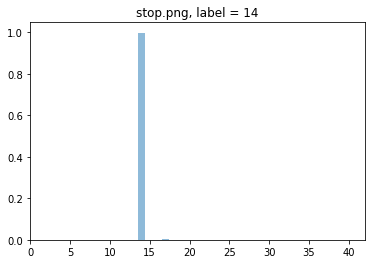

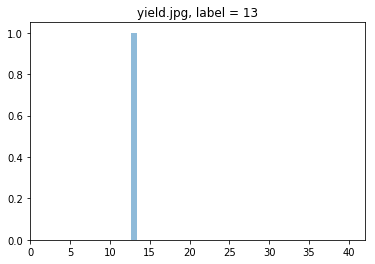

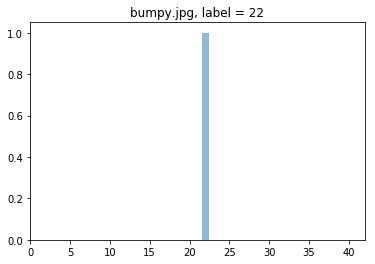

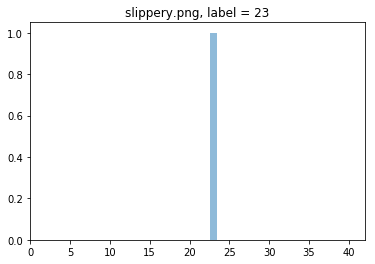

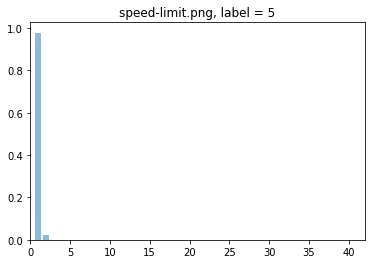

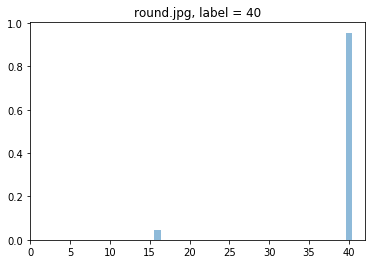

In [230]:
# Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k_getter = tf.nn.top_k(tf.nn.softmax(logits),6)

with tf.Session() as sess:
    saver.restore(sess, './lenet.ckpt')
    output = sess.run(top_k_getter, feed_dict={
        x: X_test_traffic_sign, 
        keep_prob: 1.0})

print("Top softmax probabilities:")

for i in range(6):
    print()
    print( "{}:".format( names[i] ) )
    print( "Probabilities")
    print(output.values[i])
    print( "Corresponding labels")
    print(output.indices[i])
    plt.figure()
    plt.bar(output.indices[i],output.values[i], align='center', alpha=0.5)
    plt.xlim([0,42])
    plt.title("{}, label = {}".format( names[i], Y_test_traffic_sign[i] ) )

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [231]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input =X_test_traffic_sign
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")